In [ ]:
!pip install yellowbrick
!pip install catboost
!pip install lightgbm
!pip install xgboost

### DATA ANALYSIS 


--- First 5 Rows of the Dataset ---
      obj_ID      alpha     delta        u        g        r        i        z  run_ID  rerun_ID  cam_col  field_ID  spec_obj_ID  class  redshift  plate   MJD  fiber_ID
1.237661e+18 135.689107 32.494632 23.87882 22.27530 20.39501 19.16573 18.79371    3606       301        2        79 6.543777e+18 GALAXY  0.634794   5812 56354       171
1.237665e+18 144.826101 31.274185 24.77759 22.83188 22.58444 21.16812 21.61427    4518       301        5       119 1.176014e+19 GALAXY  0.779136  10445 58158       427
1.237661e+18 142.188790 35.582444 25.26307 22.66389 20.60976 19.34857 18.94827    3606       301        2       120 5.152200e+18 GALAXY  0.644195   4576 55592       299
1.237663e+18 338.741038 -0.402828 22.13682 23.77656 21.61162 20.50454 19.25010    4192       301        3       214 1.030107e+19 GALAXY  0.932346   9149 58039       775
1.237680e+18 345.282593 21.183866 19.43718 17.58028 16.49747 15.97711 15.54461    8102       301        3       137 6.

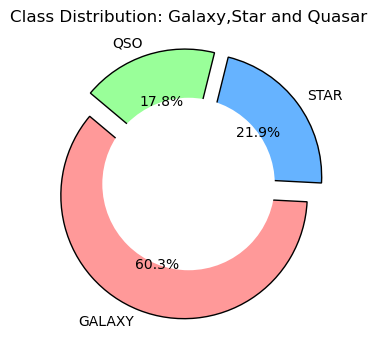

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'')

# Display the first 5 rows (structured output)
print("\n--- First 5 Rows of the Dataset ---")
print(df.head().to_string(index=False))

# Summary of data types and missing values
print("\n--- Dataset Information ---")
df.info()

# Identify numerical and continuous features
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
continuous_features = [feature for feature in numerical_features if df[feature].nunique() > 25]

print("\n--- Numerical Features ---")
print(", ".join(numerical_features))

print("\n--- Continuous Features ---")
print(", ".join(continuous_features))

# Outlier Removal: Sigma Clipping
def remove_outliers_sigma_clipping(data, features, sigma=3):
    data_cleaned = data.copy()
    for feature in features:
        mean = data_cleaned[feature].mean()
        std = data_cleaned[feature].std()
        lower_limit = mean - sigma * std
        upper_limit = mean + sigma * std
        data_cleaned = data_cleaned[(data_cleaned[feature] >= lower_limit) & (data_cleaned[feature] <= upper_limit)]
    return data_cleaned

# Apply sigma clipping to remove outliers
df = remove_outliers_sigma_clipping(df, continuous_features)

print("\n--- Dataset Information After Outlier Removal ---")
df.info()

# Handling missing values by removing rows with NaN
nan_count_before = df.isnull().sum().sum()
df.dropna(inplace=True)
nan_count_after = df.isnull().sum().sum()

print(f"\n--- Missing Values Removed ---")
print(f"Number of NaN values removed: {nan_count_before - nan_count_after}")

# Handling duplicate rows
duplicates_removed = df.duplicated().sum()
df.drop_duplicates(inplace=True)

print(f"\n--- Duplicates Removed ---")
print(f"Number of duplicate rows removed: {duplicates_removed}")

# Check the unique values and their counts for the 'class' column
class_counts = df['class'].value_counts()
print("\n--- Class Distribution ---")
print(class_counts.to_frame(name="Count").reset_index().rename(columns={"index": "Class"}))

# Plot a Donut Chart
plt.figure(figsize=(4, 4))
sizes = class_counts.values
labels = class_counts.index
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Custom colors for each class
explode = (0.1, 0.1, 0.1)  # Slightly separate each slice for emphasis

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, wedgeprops={'edgecolor': 'black'})
# Add a white circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Class Distribution: Galaxy,Star and Quasar")
plt.show()

### ASTRONOMICAL COLOUR COLOUR DIAGRAM TO CHECK THE DEPENDENCY 

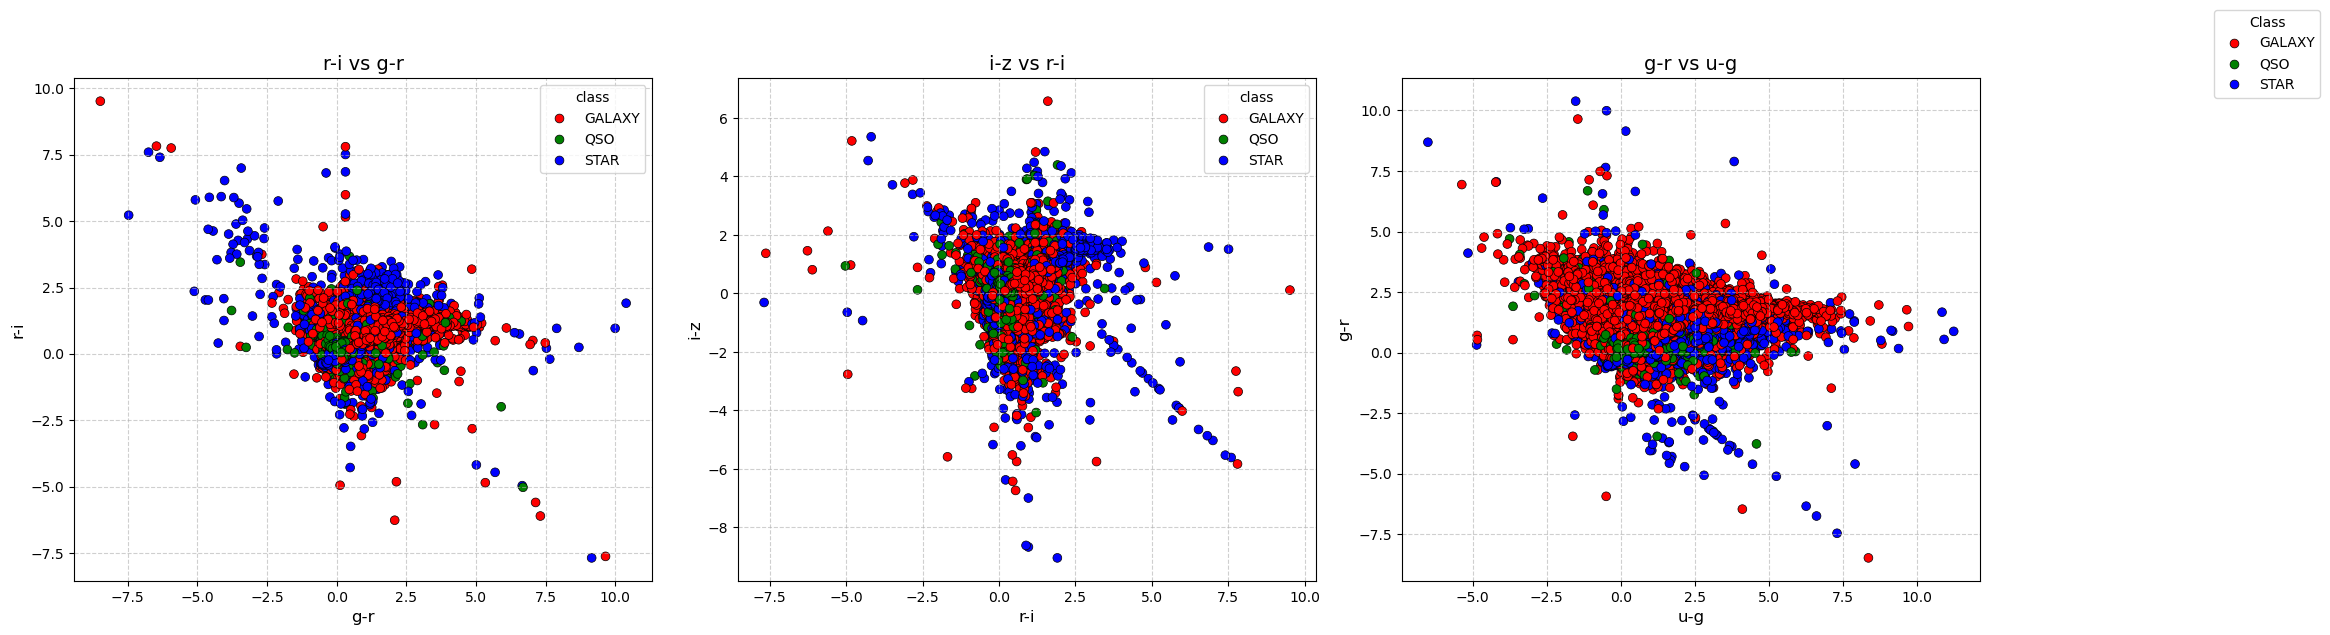

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is the dataset with the specified columns
# Add new columns based on differences
df['g-r'] = df['g'] - df['r']
df['r-i'] = df['r'] - df['i']
df['i-z'] = df['i'] - df['z']
df['u-g'] = df['u'] - df['g']

# Map the class to colors
color_map = {'GALAXY': 'red', 'STAR': 'blue', 'QSO': 'green'}

# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)

# Scatter Plot 1: y = r-i, x = g-r
sns.scatterplot(
    data=df,
    x='g-r',
    y='r-i',
    hue='class',
    palette=color_map,
    s=40,
    edgecolor='black',
    ax=axes[0]
)
axes[0].set_title('r-i vs g-r', fontsize=14)
axes[0].set_xlabel('g-r', fontsize=12)
axes[0].set_ylabel('r-i', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Scatter Plot 2: y = i-z, x = r-i
sns.scatterplot(
    data=df,
    x='r-i',
    y='i-z',
    hue='class',
    palette=color_map,
    s=40,
    edgecolor='black',
    ax=axes[1]
)
axes[1].set_title('i-z vs r-i', fontsize=14)
axes[1].set_xlabel('r-i', fontsize=12)
axes[1].set_ylabel('i-z', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Scatter Plot 3: y = g-r, x = u-g
sns.scatterplot(
    data=df,
    x='u-g',
    y='g-r',
    hue='class',
    palette=color_map,
    s=40,
    edgecolor='black',
    ax=axes[2]
)
axes[2].set_title('g-r vs u-g', fontsize=14)
axes[2].set_xlabel('u-g', fontsize=12)
axes[2].set_ylabel('g-r', fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.legend(title='Class', loc='upper right', bbox_to_anchor=(1.6, 1.15))  # Adjust legend position
plt.show()


### ANOVA RESULTS WITH F VALUE TO CHECK WHICH PARAMETER CAN DISTINGUISH THE TARGETS PERFECTLY.

In [13]:
import pandas as pd
from sklearn.feature_selection import f_classif

# Assuming `df` is the dataset
# Adding new calculated features
df['g-r'] = df['g'] - df['r']
df['r-i'] = df['r'] - df['i']
df['i-z'] = df['i'] - df['z']
df['u-g'] = df['u'] - df['g']
df['g-i'] = df['g'] - df['i']
df['z-g'] = df['z'] - df['g']
df['r-z'] = df['r'] - df['z']

# Separate features (X) and target variable (y)
X = df.drop(columns=['class'])  # Exclude the target column
y = df['class']  # Target variable

# Calculate ANOVA F-values and P-values
f_values, p_values = f_classif(X, y)

# Create a DataFrame for ANOVA results
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': f_values,
    'P-Value': p_values
})

# Sort features by F-Value in descending order
anova_results = anova_results.sort_values(by='F-Value', ascending=False)

# Display the updated ANOVA results
print("\n--- ANOVA Results with New Features ---")
print(anova_results)

# Extract the feature with the highest F-Value
max_f_value_feature = anova_results.iloc[0]
print("\n--- Feature with Maximum F-Value ---")
print(f"Feature: {max_f_value_feature['Feature']}, F-Value: {max_f_value_feature['F-Value']:.4f}, P-Value: {max_f_value_feature['P-Value']:.4e}")



--- ANOVA Results with New Features ---
        Feature        F-Value        P-Value
13     redshift  102070.707696   0.000000e+00
21          g-i   27413.299057   0.000000e+00
17          g-r   25710.724137   0.000000e+00
22          z-g   24373.754892   0.000000e+00
18          r-i   13738.673303   0.000000e+00
23          r-z   12637.908242   0.000000e+00
7             z    9058.025355   0.000000e+00
20          u-g    8234.675443   0.000000e+00
6             i    7427.685241   0.000000e+00
12  spec_obj_ID    4922.748566   0.000000e+00
14        plate    4922.742833   0.000000e+00
3             u    4727.363456   0.000000e+00
5             r    4162.091565   0.000000e+00
15          MJD    4110.651163   0.000000e+00
19          i-z    3972.398229   0.000000e+00
4             g    3630.634657   0.000000e+00
16     fiber_ID     406.678646  1.342170e-176
2         delta     208.429965   4.748280e-91
8        run_ID     127.390855   5.602070e-56
0        obj_ID     127.378720   5.6702

C:\Users\mousa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mousa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### ML AND DEEP LEARNING MODELS 
## Traditional Machine Learning Models
Gaussian Naive Bayes (GaussianNB): 
Bernoulli Naive Bayes (BernoulliNB):
Logistic Regression:
K-Nearest Neighbors (KNeighborsClassifier):
Decision Tree Classifier:
Random Forest Classifier:
Gradient Boosting Classifier:
Support Vector Classifier (SVC):

## Deep Learning Models
Multilayer Perceptron (MLP):
Convolutional Neural Network (CNN):
Long Short-Term Memory Network (LSTM):

## Additional Features
All models are compared using accuracy scores.
Class imbalance is handled using CLASS WEIGHT technique.
The best-performing model is evaluated using:
Confusion Matrix.
Training and validation accuracy/loss curves (for deep learning models).

Class Mapping: {'GALAXY': 0, 'QSO': 1, 'STAR': 2}
Class Weights: {0: 0.5527335715059002, 1: 1.8792697290930507, 2: 1.5181683021112102}
Training GaussianNB...
GaussianNB: 0.8931
Training BernoulliNB...
BernoulliNB: 0.7137
Training LogisticRegression...
LogisticRegression: 0.9431
Training KNeighborsClassifier...
KNeighborsClassifier: 0.9272
Training DecisionTreeClassifier...
DecisionTreeClassifier: 0.9657
Training RandomForestClassifier...
RandomForestClassifier: 0.9750
Training GradientBoostingClassifier...
GradientBoostingClassifier: 0.9767
Training SupportVectorClassifier...
SupportVectorClassifier: 0.9606
Training MLP...
Epoch 1/10


C:\Users\mousa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\mousa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\mousa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2274/2274 ━━━━━━━━━━━━━━━━━━━━ 3s 881us/step - accuracy: 0.8403 - loss: 0.3711 - val_accuracy: 0.9548 - val_loss: 0.1501
Epoch 2/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - accuracy: 0.9399 - loss: 0.1768 - val_accuracy: 0.9614 - val_loss: 0.1401
Epoch 3/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 2s 822us/step - accuracy: 0.9485 - loss: 0.1498 - val_accuracy: 0.9653 - val_loss: 0.1254
Epoch 4/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.9516 - loss: 0.1419 - val_accuracy: 0.9598 - val_loss: 0.1411
Epoch 5/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.9544 - loss: 0.1334 - val_accuracy: 0.9564 - val_loss: 0.1546
Epoch 6/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 2s 803us/step - accuracy: 0.9574 - loss: 0.1284 - val_accuracy: 0.9606 - val_loss: 0.1370
Epoch 7/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 2s 804us/step - accuracy: 0.9573 - loss: 0.1292 - val_accuracy: 0.9648 - val_loss: 0.1180
Epoch 8/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 2s 840us/step - accuracy: 0.9582 - loss: 0.12

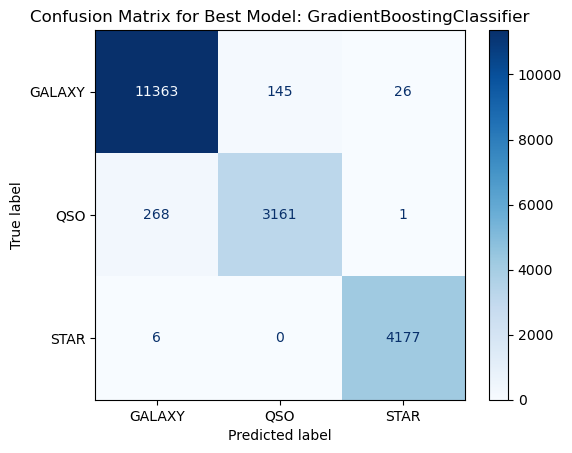

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Import machine learning models
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

# Import deep learning models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.utils import to_categorical

# Step 1: Encode class labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['class'])  # Convert 'GALAXY', 'STAR', 'QSO' to integers

# Map the encoded values back to class names for reference
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:", class_mapping)

# Step 2: Preprocessing features
df['G-I'] = df['g'] - df['i']  # G-I column
df['Z-G'] = df['z'] - df['g']  # Z-G column
X = df.drop(['class'], axis=1).values  # Features

# Step 3: Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute Class Weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
print(f"Class Weights: {class_weight_dict}")

# Step 4: Machine Learning Models
ml_models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(class_weight='balanced', random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'RandomForestClassifier': RandomForestClassifier(class_weight='balanced', random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SupportVectorClassifier': SVC(probability=True, class_weight='balanced', random_state=42)
}

ml_results = {}
for name, model in ml_models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    ml_results[name] = accuracy
    print(f"{name}: {accuracy:.4f}")

# Step 5: Deep Learning Models
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

# Split validation data (5% of training data)
X_train, X_val, y_train_oh, y_val_oh = train_test_split(X_train, y_train_oh, test_size=0.05, random_state=42)

def build_mlp():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(y_train_oh.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_cnn():
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(y_train_oh.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_lstm():
    model = Sequential([
        LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=False),
        Dense(64, activation='relu'),
        Dense(y_train_oh.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

X_train_cnn = X_train[..., np.newaxis]
X_val_cnn = X_val[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]

dl_models = {
    'MLP': build_mlp(),
    'CNN': build_cnn(),
    'LSTM': build_lstm()
}

history_dict = {}
dl_results = {}
for name, model in dl_models.items():
    print(f"Training {name}...")
    if name in ['CNN', 'LSTM']:
        history = model.fit(
            X_train_cnn, y_train_oh,
            epochs=10, batch_size=32,
            validation_data=(X_val_cnn, y_val_oh),
            verbose=1,
            class_weight=class_weight_dict
        )
        y_pred = model.predict(X_test_cnn)
    else:
        history = model.fit(
            X_train, y_train_oh,
            epochs=10, batch_size=32,
            validation_data=(X_val, y_val_oh),
            verbose=1,
            class_weight=class_weight_dict
        )
        y_pred = model.predict(X_test)

    history_dict[name] = history
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test, y_pred_classes)
    dl_results[name] = accuracy
    print(f"{name}: {accuracy:.4f}")

# Combine ML and DL results
all_results = {**ml_results, **dl_results}
best_model_name = max(all_results, key=all_results.get)
print(f"\nBest Model: {best_model_name} with Accuracy: {all_results[best_model_name]:.4f}")

# Confusion Matrix for Best Model
if best_model_name in dl_models:
    best_model = dl_models[best_model_name]
    y_pred_best = best_model.predict(X_test_cnn if best_model_name in ['CNN', 'LSTM'] else X_test)
    y_pred_classes = np.argmax(y_pred_best, axis=1)
else:
    best_model = ml_models[best_model_name]
    y_pred_classes = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for Best Model: {best_model_name}")
plt.show()

# Accuracy and Loss for Deep Learning
if best_model_name in dl_models:
    history = history_dict[best_model_name]
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

ONLY DEEP LEARNING : 

Class Mapping: {'GALAXY': 0, 'QSO': 1, 'STAR': 2}
Class Weights: {0: 0.5527335715059002, 1: 1.8792697290930507, 2: 1.5181683021112102}
Training MLP...
Epoch 1/10


C:\Users\mousa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\mousa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\mousa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2274/2274 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8451 - loss: 0.3828 - val_accuracy: 0.9540 - val_loss: 0.1643
Epoch 2/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - accuracy: 0.9404 - loss: 0.1684 - val_accuracy: 0.9593 - val_loss: 0.1383
Epoch 3/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 2s 931us/step - accuracy: 0.9490 - loss: 0.1468 - val_accuracy: 0.9648 - val_loss: 0.1260
Epoch 4/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.9544 - loss: 0.1350 - val_accuracy: 0.9650 - val_loss: 0.1264
Epoch 5/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 2s 833us/step - accuracy: 0.9536 - loss: 0.1353 - val_accuracy: 0.9548 - val_loss: 0.1381
Epoch 6/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - accuracy: 0.9570 - loss: 0.1237 - val_accuracy: 0.9658 - val_loss: 0.1225
Epoch 7/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - accuracy: 0.9581 - loss: 0.1226 - val_accuracy: 0.9666 - val_loss: 0.1151
Epoch 8/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.9590 - loss: 0.1214

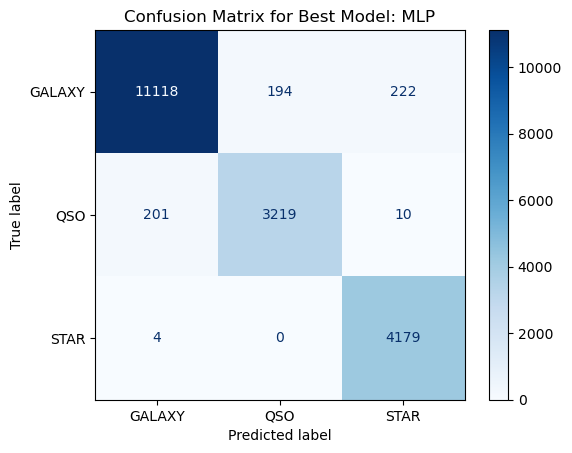

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming `df` is already loaded with the dataset

# Step 1: Encode class labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['class'])  # Convert 'GALAXY', 'STAR', 'QSO' to integers

# Map the encoded values back to class names for reference
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:", class_mapping)

# Step 2: Preprocessing features
df['G-I'] = df['g'] - df['i']  # G-I column
df['Z-G'] = df['z'] - df['g']  # Z-G column
X = df.drop(['class'], axis=1).values  # Features

# Step 3: Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Compute Class Weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
print(f"Class Weights: {class_weight_dict}")

# Step 6: Convert to one-hot encoding for deep learning
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

# Step 7: Split validation data (5% of training data)
X_train, X_val, y_train_oh, y_val_oh = train_test_split(X_train, y_train_oh, test_size=0.05, random_state=42)

# Define Deep Learning Models
def build_mlp():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(y_train_oh.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_cnn():
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(y_train_oh.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_lstm():
    model = Sequential([
        LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=False),
        Dense(64, activation='relu'),
        Dense(y_train_oh.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 8: Reshape data for CNN and LSTM
X_train_cnn = X_train[..., np.newaxis]
X_val_cnn = X_val[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]

# Step 9: Train and Evaluate Models
dl_models = {
    'MLP': build_mlp(),
    'CNN': build_cnn(),
    'LSTM': build_lstm()
}

dl_results = {}
for name, model in dl_models.items():
    print(f"Training {name}...")
    if name in ['CNN', 'LSTM']:
        model.fit(
            X_train_cnn, y_train_oh,
            epochs=10, batch_size=32,
            validation_data=(X_val_cnn, y_val_oh),
            verbose=1,
            class_weight=class_weight_dict
        )
        y_pred = model.predict(X_test_cnn)
    else:
        model.fit(
            X_train, y_train_oh,
            epochs=10, batch_size=32,
            validation_data=(X_val, y_val_oh),
            verbose=1,
            class_weight=class_weight_dict
        )
        y_pred = model.predict(X_test)

    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test, y_pred_classes)
    dl_results[name] = accuracy
    print(f"{name}: {accuracy:.4f}")

# Step 10: Determine Best Model
best_model_name = max(dl_results, key=dl_results.get)
print("\nBest Deep Learning Model:", best_model_name, "with Accuracy:", dl_results[best_model_name])

# Step 11: Evaluate Best Model
best_model = dl_models[best_model_name]
if best_model_name in ['CNN', 'LSTM']:
    y_pred_best = best_model.predict(X_test_cnn)
else:
    y_pred_best = best_model.predict(X_test)

y_pred_classes = np.argmax(y_pred_best, axis=1)

# Step 12: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for Best Model: {best_model_name}")
plt.show()
